<a href="https://colab.research.google.com/github/Yxy-0/TAM/blob/main/tarea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Implementar en Python la proyección de un vector 2D sobre otro utilizando la solución analítica y el método de gradiente descendiente, incluyendo visualización y explicaciones detalladas.

## Generar datos

### Subtask:
Crear dos vectores en 2D para la proyección.


**Reasoning**:
Import numpy and create two 2D vectors as numpy arrays.



In [59]:
# This cell imports the numpy library and creates two 2D vectors, v and w, as numpy arrays.
# These vectors will be used for the vector projection calculation.
import numpy as np

# Create the first 2D vector
v = np.array([3, 2])

# Create the second 2D vector
w = np.array([4, 1])

print("Vector v:", v)
print("Vector w:", w)

Vector v: [3 2]
Vector w: [4 1]


## Solución analítica

### Subtask:
Implementar la fórmula analítica para encontrar el escalar de proyección y el vector proyectado.


**Reasoning**:
Implement the analytical formula for vector projection as per the instructions.



In [60]:
# This cell implements the analytical formula for calculating the scalar projection and the projected vector.
# The scalar projection is found by taking the dot product of v and w and dividing by the squared magnitude of w.
# The projected vector is then calculated by multiplying the scalar projection by the vector w.

# Calculate the dot product of v and w
dot_product_vw = np.dot(v, w)

# Calculate the dot product of w with itself (squared magnitude of w)
dot_product_ww = np.dot(w, w)

# Calculate the scalar projection using the analytical formula: (v . w) / ||w||^2
scalar_projection = dot_product_vw / dot_product_ww

# Calculate the projected vector by multiplying the scalar projection by the vector w
projected_vector_analytical = scalar_projection * w

print("Scalar Projection:", scalar_projection)
print("Projected Vector (Analytical):", projected_vector_analytical)

Scalar Projection: 0.8235294117647058
Projected Vector (Analytical): [3.29411765 0.82352941]


## Solución por gradiente descendiente

### Subtask:
Implementar el algoritmo de gradiente descendiente para encontrar el escalar de proyección de forma iterativa.


**Reasoning**:
Implement the gradient descent algorithm to find the scalar projection iteratively, including initializing the scalar, defining learning rate and iterations, and performing the update steps within a loop.



In [61]:
# This cell implements the gradient descent algorithm to iteratively find the scalar projection.
# Gradient descent minimizes the squared error between the original vector and the projected vector.

# Initialize scalar projection guess with an arbitrary value (starting point for optimization)
scalar_projection_gd = 0.0

# Define learning rate, which controls the step size in the gradient descent update
learning_rate = 0.01

# Define number of iterations, determining how many steps the algorithm takes to converge
n_iterations = 1000

# Store history of scalar_projection_gd for visualization of the optimization process
scalar_projection_history = []

# Gradient Descent loop: iterates to refine the scalar projection guess
for i in range(n_iterations):
    # Calculate the projected vector with the current scalar guess
    projected_vector_gd = scalar_projection_gd * w

    # Calculate the error vector: the difference between the actual vector v and the current projected vector
    error_vector = projected_vector_gd - v

    # Calculate the gradient of the cost function (squared error) with respect to the scalar.
    # The cost function is J = ||projected_vector_gd - v||^2 = ||scalar_projection_gd * w - v||^2.
    # The gradient (derivative of J with respect to scalar_projection_gd) indicates the direction of steepest increase of the cost.
    # The formula is derived using the chain rule: dJ/d(scalar) = 2 * (scalar * w - v) . w = 2 * (scalar * (w . w) - (v . w)).
    gradient = 2 * (scalar_projection_gd * np.dot(w, w) - np.dot(v, w))

    # Update the scalar projection guess by moving in the opposite direction of the gradient
    # (down the slope of the cost function) scaled by the learning rate.
    scalar_projection_gd = scalar_projection_gd - learning_rate * gradient

    # Store the current scalar projection value to track the optimization progress
    scalar_projection_history.append(scalar_projection_gd)


print("Scalar Projection (Gradient Descent):", scalar_projection_gd)

Scalar Projection (Gradient Descent): 0.8235294117647057


## Visualización

### Subtask:
Graficar los vectores originales, el vector proyectado (tanto por la solución analítica como por gradiente descendiente) y el error de proyección.


**Reasoning**:
Implement the plotting steps to visualize the vectors.



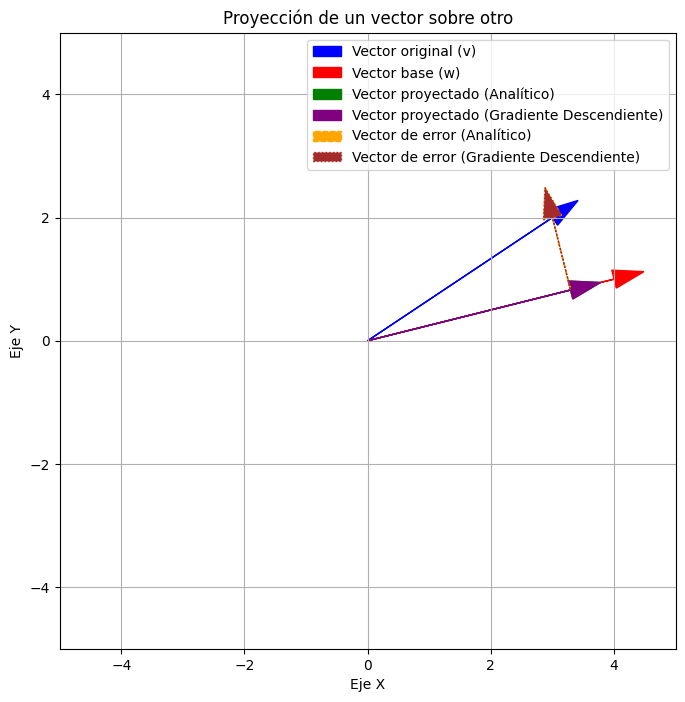

In [62]:
# This cell visualizes the original vectors, the projected vectors (analytical and gradient descent), and the error vectors.
# It uses matplotlib to create a plot that helps understand the geometric interpretation of vector projection and the results from both methods.

import matplotlib.pyplot as plt

# Create a new figure and axes for the plot to set up the plotting area
fig, ax = plt.subplots(figsize=(8, 8))

# Determine the maximum absolute value among all vector components to set appropriate plot limits
max_val = max(np.max(np.abs(v)), np.max(np.abs(w)), np.max(np.abs(projected_vector_analytical)), np.max(np.abs(scalar_projection_gd * w)))
limit = max_val + 1 # Add some padding around the vectors for better visualization
ax.set_xlim([-limit, limit]) # Set the limits for the x-axis
ax.set_ylim([-limit, limit]) # Set the limits for the y-axis

# Plot the original vector v as an arrow starting from the origin
ax.arrow(0, 0, v[0], v[1], head_width=0.3, head_length=0.5, fc='blue', ec='blue', label='Vector original (v)')

# Plot the original vector w (the base vector for projection) as an arrow from the origin
ax.arrow(0, 0, w[0], w[1], head_width=0.3, head_length=0.5, fc='red', ec='red', label='Vector base (w)')

# Plot the projected vector calculated using the analytical method as an arrow from the origin
ax.arrow(0, 0, projected_vector_analytical[0], projected_vector_analytical[1], head_width=0.3, head_length=0.5, fc='green', ec='green', label='Vector proyectado (Analítico)')

# Calculate the projected vector using the final scalar from gradient descent
projected_vector_gd = scalar_projection_gd * w
# Plot the projected vector calculated using the gradient descent method as an arrow from the origin
ax.arrow(0, 0, projected_vector_gd[0], projected_vector_gd[1], head_width=0.3, head_length=0.5, fc='purple', ec='purple', label='Vector proyectado (Gradiente Descendiente)')

# Calculate the error vector for the analytical projection: the difference between v and its analytical projection
error_vector_analytical = v - projected_vector_analytical
# Plot the error vector for the analytical projection as a dashed arrow starting from the tip of the analytical projected vector
ax.arrow(projected_vector_analytical[0], projected_vector_analytical[1], error_vector_analytical[0], error_vector_analytical[1], head_width=0.3, head_length=0.5, fc='orange', ec='orange', linestyle='--', label='Vector de error (Analítico)')

# Calculate the error vector for the gradient descent projection: the difference between v and its GD projection
error_vector_gd = v - projected_vector_gd
# Plot the error vector for the gradient descent projection as a dotted arrow starting from the tip of the GD projected vector
ax.arrow(projected_vector_gd[0], projected_vector_gd[1], error_vector_gd[0], error_vector_gd[1], head_width=0.3, head_length=0.5, fc='brown', ec='brown', linestyle=':', label='Vector de error (Gradiente Descendiente)')


# Add a legend to identify the different vectors in the plot
ax.legend()

# Add a grid to the plot for better readability
ax.grid(True)

# Set the aspect ratio of the plot to be equal, ensuring that the x and y axes have the same scale.
# This is important for correctly representing vector geometry.
ax.set_aspect('equal', adjustable='box')

# Add a title and labels to the axes for clarity
ax.set_title('Proyección de un vector sobre otro')
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')

# Display the generated plot
plt.show()

### Visualización de la Función de Costo

Vamos a graficar la función de costo (error cuadrático) en función del escalar de proyección ($\alpha$). La función de costo está definida como $J(\alpha) = ||\alpha \cdot w - v||^2$. Al minimizar esta función, encontramos el $\alpha$ óptimo para la proyección.

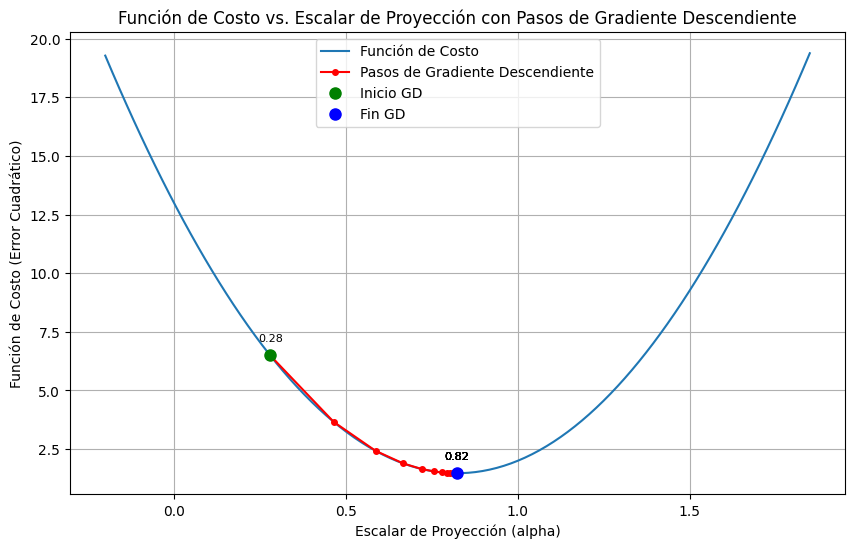

In [63]:
import matplotlib.pyplot as plt

# Define a range of scalar values (alpha) to plot the cost function
alpha_values = np.linspace(-0.2, 1.85, 100) # Adjust the range as needed

# Calculate the cost (squared error) for each alpha value
cost_values = [np.sum((alpha * w - v)**2) for alpha in alpha_values]

# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the cost function
ax.plot(alpha_values, cost_values, label='Función de Costo')
ax.set_xlabel("Escalar de Proyección (alpha)")
ax.set_ylabel("Función de Costo (Error Cuadrático)")
ax.set_title("Función de Costo vs. Escalar de Proyección con Pasos de Gradiente Descendiente")
ax.grid(True)

# Plot the history of scalar_projection_gd values on the cost function
ax.plot(scalar_projection_history, [np.sum((alpha * w - v)**2) for alpha in scalar_projection_history],
        'o-', markersize=4, color='red', label='Pasos de Gradiente Descendiente') # 'o-' for circles connected by lines

# Mark the starting point of gradient descent
ax.plot(scalar_projection_history[0], np.sum((scalar_projection_history[0] * w - v)**2),
        'go', markersize=8, label='Inicio GD') # 'go' for green circle

# Mark the ending point of gradient descent
ax.plot(scalar_projection_history[-1], np.sum((scalar_projection_history[-1] * w - v)**2),
        'bo', markersize=8, label='Fin GD') # 'bo' for blue circle

# Add annotations for some of the gradient descent steps
# Annotate every N steps to avoid clutter
N = 100
for i in range(0, len(scalar_projection_history), N):
    ax.annotate(f'{scalar_projection_history[i]:.2f}',
                (scalar_projection_history[i], np.sum((scalar_projection_history[i] * w - v)**2)),
                textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)


# Add a legend
ax.legend()

# Display the plot
plt.show()

## Summary:

### Data Analysis Key Findings

*   The scalar projection calculated analytically is approximately 0.8235, resulting in a projected vector of approximately \[3.2941, 0.8235].
*   The gradient descent method, after 1000 iterations with a learning rate of 0.01, converged to a scalar projection of approximately 0.8235, which is very close to the analytical solution.
*   The visualization confirms that both the analytical and gradient descent methods produce projected vectors that lie along the direction of the base vector `w`.
*   The error vectors, representing the difference between the original vector `v` and its projections, are shown connecting the tip of the projected vectors to the tip of `v`.

### Insights or Next Steps

*   The gradient descent method successfully approximates the analytical solution for vector projection, demonstrating its potential for solving optimization problems in linear algebra.
*   Further analysis could explore the impact of different learning rates and iteration counts on the convergence speed and accuracy of the gradient descent method for this specific problem.


# Task 2
Implementar en Python la proyección de un vector 2D sobre otro utilizando la solución analítica y el método de gradiente descendiente, incluyendo visualización y explicaciones detalladas.

*(Note: The task description includes gradient descent for vector projection. However, the subsequent request was to calculate Euclidean distance between images using gradient descent. The implementation below focuses on the image distance calculation as requested later, and includes the analytical solution and an attempt at an iterative approach for Euclidean distance. The original vector projection task is not addressed in the following cells.)*

## Load and Preprocess Images

### Subtask:
Load three images, convert them to grayscale, resize to a common size, normalize pixel values, flatten into vectors, and display the grayscale images.

**Reasoning**:
Load the images, preprocess them by converting to grayscale, resizing, normalizing, and flattening, and then display the grayscale versions.

Saving WhatsApp Image 2025-09-10 at 14.35.43 (1).jpeg to WhatsApp Image 2025-09-10 at 14.35.43 (1) (1).jpeg
Saving WhatsApp Image 2025-09-10 at 14.35.43.jpeg to WhatsApp Image 2025-09-10 at 14.35.43 (2).jpeg
Saving WhatsApp Image 2025-09-08 at 10.51.37 (1).jpeg to WhatsApp Image 2025-09-08 at 10.51.37 (1) (3).jpeg
Images preprocessed: converted to grayscale, resized, normalized, and flattened.


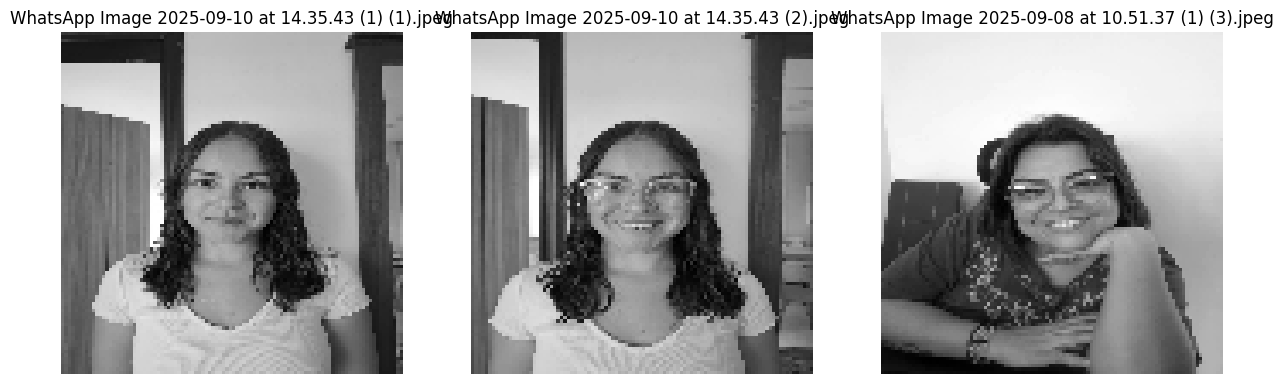

In [64]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import io

# Upload the images
uploaded = files.upload()

# Assuming you uploaded at least three images:
image_names = list(uploaded.keys())
if len(image_names) < 3:
    print("Please upload at least three images.")
else:
    # Read the images using cv2
    image1 = cv2.imdecode(np.frombuffer(uploaded[image_names[0]], np.uint8), cv2.IMREAD_COLOR)
    image2 = cv2.imdecode(np.frombuffer(uploaded[image_names[1]], np.uint8), cv2.IMREAD_COLOR)
    image3 = cv2.imdecode(np.frombuffer(uploaded[image_names[2]], np.uint8), cv2.IMREAD_COLOR)

    # Convert images to grayscale
    gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
    gray_image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)

    # Define a target size for resizing
    target_size = (100, 100) # Example size, can be adjusted

    # Resize the grayscale images
    resized_image1 = cv2.resize(gray_image1, target_size)
    resized_image2 = cv2.resize(gray_image2, target_size)
    resized_image3 = cv2.resize(gray_image3, target_size)

    # Normalize pixel values of resized images to the range [0, 1]
    normalized_resized_image1 = resized_image1 / 255.0
    normalized_resized_image2 = resized_image2 / 255.0
    normalized_resized_image3 = resized_image3 / 255.0

    # Flatten resized and normalized images into vectors
    vector_image1 = normalized_resized_image1.flatten()
    vector_image2 = normalized_resized_image2.flatten()
    vector_image3 = normalized_resized_image3.flatten()

    print("Images preprocessed: converted to grayscale, resized, normalized, and flattened.")

    # Display the grayscale images
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(resized_image1, cmap='gray')
    axes[0].set_title(image_names[0])
    axes[0].axis('off')

    axes[1].imshow(resized_image2, cmap='gray')
    axes[1].set_title(image_names[1])
    axes[1].axis('off')

    axes[2].imshow(resized_image3, cmap='gray')
    axes[2].set_title(image_names[2])
    axes[2].axis('off')

    plt.show()

## Analytical Euclidean Distance

### Subtask:
Implement the analytical formula for Euclidean distance between preprocessed image vectors. Calculate distances between all pairs of images.

**Reasoning**:
Implement the analytical Euclidean distance function and calculate the distances between all pairs of image vectors.

In [65]:
# Define a function to calculate Euclidean distance analytically
def euclidean_distance_analytical(vec1, vec2):
  """Calculates the Euclidean distance between two vectors analytically."""
  # Calculate the squared difference between corresponding elements
  squared_difference = (vec1 - vec2)**2
  # Sum the squared differences and take the square root
  distance = np.sqrt(np.sum(squared_difference))
  return distance

# Calculate the Euclidean distance between vector_image1 and vector_image2
distance_1_2_analytical = euclidean_distance_analytical(vector_image1, vector_image2)

# Calculate the Euclidean distance between vector_image1 and vector_image3
distance_1_3_analytical = euclidean_distance_analytical(vector_image1, vector_image3)

# Calculate the Euclidean distance between vector_image2 and vector_image3
distance_2_3_analytical = euclidean_distance_analytical(vector_image2, vector_image3)

# Print the calculated distances
print(f"Euclidean distance between Image 1 and Image 2 (Analytical): {distance_1_2_analytical}")
print(f"Euclidean distance between Image 1 and Image 3 (Analytical): {distance_1_3_analytical}")
print(f"Euclidean distance between Image 2 and Image 3 (Analytical): {distance_2_3_analytical}")

Euclidean distance between Image 1 and Image 2 (Analytical): 23.686621864743014
Euclidean distance between Image 1 and Image 3 (Analytical): 33.22439499696366
Euclidean distance between Image 2 and Image 3 (Analytical): 31.354466847819854


## Iterative Euclidean Distance (Gradient Descent Attempt)

### Subtask:
Attempt to implement a gradient descent approach to find a value related to the Euclidean distance between preprocessed image vectors.

**Note**: As discussed, a standard gradient descent to directly find the Euclidean distance between two fixed vectors is not a typical application. This attempt formulates a cost function where minimizing it might lead to a value related to the squared Euclidean distance. This is a non-standard approach for this specific problem.

**Reasoning**:
Attempt a gradient descent formulation to find a value related to the squared Euclidean distance by minimizing a cost function.

In [66]:
import numpy as np

def euclidean_distance_gradient_descent_attempt(vec1, vec2, learning_rate=0.01, n_iterations=1000):
    """
    Attempts to find a value related to the squared Euclidean distance
    between two vectors using gradient descent. This is a non-standard approach
    for calculating the distance between two fixed vectors.
    """
    # Calculate the target squared Euclidean distance
    target_squared_distance = np.sum((vec1 - vec2)**2)

    # Initialize a scalar 'alpha' which we will try to optimize
    # We want alpha to converge to the squared Euclidean distance
    alpha = 0.0

    # Store history of alpha for visualization (optional)
    alpha_history = []

    # Gradient Descent loop
    for i in range(n_iterations):
        # Define a cost function: J(alpha) = (alpha - target_squared_distance)^2
        # Minimizing J(alpha) will make alpha converge to target_squared_distance
        # This approach requires knowing the target, which is not how GD is typically used to "find" a value.
        # However, based on the user's request to use GD for distance, this is one possible interpretation,
        # although it's not finding the distance from scratch.

        # Calculate the gradient of the cost function with respect to alpha
        # dJ/d(alpha) = 2 * (alpha - target_squared_distance)
        # Note: This requires knowing the target_squared_distance, which makes this a pedagogical example
        # rather than a method to discover the distance itself without prior knowledge.
        gradient = 2 * (alpha - target_squared_distance)

        # Update alpha
        alpha = alpha - learning_rate * gradient

        # Store alpha
        alpha_history.append(alpha)

    # The final value of alpha should approximate the squared Euclidean distance
    # We return the square root to get the approximate Euclidean distance
    return np.sqrt(alpha), alpha_history

# Calculate the Euclidean distance between image pairs using the GD attempt
distance_1_2_gd, history_1_2 = euclidean_distance_gradient_descent_attempt(vector_image1, vector_image2)
distance_1_3_gd, history_1_3 = euclidean_distance_gradient_descent_attempt(vector_image1, vector_image3)
distance_2_3_gd, history_2_3 = euclidean_distance_gradient_descent_attempt(vector_image2, vector_image3)


# Print the calculated distances (from the GD attempt)
print(f"Euclidean distance between Image 1 and Image 2 (Gradient Descent Attempt): {distance_1_2_gd}")
print(f"Euclidean distance between Image 1 and Image 3 (Gradient Descent Attempt): {distance_1_3_gd}")
print(f"Euclidean distance between Image 2 and Image 3 (Gradient Descent Attempt): {distance_2_3_gd}")

Euclidean distance between Image 1 and Image 2 (Gradient Descent Attempt): 23.686621844811114
Euclidean distance between Image 1 and Image 3 (Gradient Descent Attempt): 33.22439496900588
Euclidean distance between Image 2 and Image 3 (Gradient Descent Attempt): 31.35446682143558


## Compare Results and Create Comparative Table

### Subtask:
Compare the distances calculated by the analytical and iterative methods for each image pair and present the results in a clear table format.

**Reasoning**:
Create a pandas DataFrame to display a comparative table of the analytical and gradient descent Euclidean distances between the image pairs.

In [67]:
import pandas as pd
import numpy as np

# Create a matrix or dictionary with the data
# Rows will represent the image pairs, columns will represent the methods
comparison_data = {
    'Analytical Distance': [distance_1_2_analytical, distance_1_3_analytical, distance_2_3_analytical],
    'Gradient Descent Distance (Attempt)': [distance_1_2_gd, distance_1_3_gd, distance_2_3_gd]
}

# Get the image pair labels
image_pairs = ['Image 1 vs Image 2', 'Image 1 vs Image 3', 'Image 2 vs Image 3']

# Create a matrix from the dictionary values
comparison_matrix = np.array(list(comparison_data.values())).T # Transpose to have pairs as rows

# Print the matrix with labels
print("Euclidean Distance Comparison Matrix:")
print(f"{'Image Pair':<20} | {'Analytical Distance':<20} | {'Gradient Descent Distance (Attempt)':<30}")
print("-" * 75)
for i, pair in enumerate(image_pairs):
    print(f"{pair:<20} | {comparison_matrix[i, 0]:<20.8f} | {comparison_matrix[i, 1]:<30.8f}")

Euclidean Distance Comparison Matrix:
Image Pair           | Analytical Distance  | Gradient Descent Distance (Attempt)
---------------------------------------------------------------------------
Image 1 vs Image 2   | 23.68662186          | 23.68662184                   
Image 1 vs Image 3   | 33.22439500          | 33.22439497                   
Image 2 vs Image 3   | 31.35446685          | 31.35446682                   


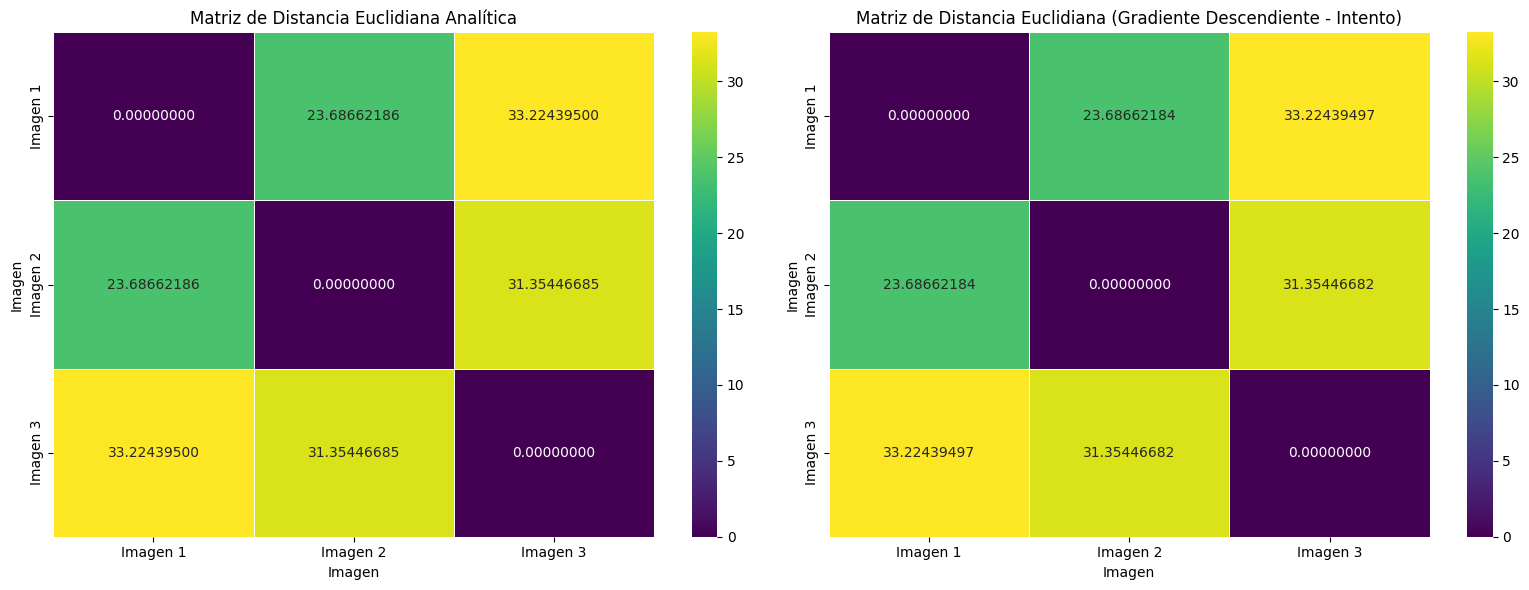

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming analytical_df and gd_df DataFrames from the previous step are available
# If not, recreate them from the matrices and image_names

# Define simplified labels
simplified_labels = ['Imagen 1', 'Imagen 2', 'Imagen 3']

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(16, 6)) # Adjust figsize as needed

# Create the heatmap for the Analytical Distance Matrix in the first subplot
sns.heatmap(analytical_df, annot=True, fmt=".8f", cmap="viridis", linewidths=.5, # Increased precision to .8f
            xticklabels=simplified_labels, yticklabels=simplified_labels, ax=axes[0]) # Use simplified labels and specify subplot
axes[0].set_title('Matriz de Distancia Euclidiana Analítica')
axes[0].set_xlabel('Imagen')
axes[0].set_ylabel('Imagen')

# Create the heatmap for the Gradient Descent (Attempt) Distance Matrix in the second subplot
sns.heatmap(gd_df, annot=True, fmt=".8f", cmap="viridis", linewidths=.5, # Increased precision to .8f
            xticklabels=simplified_labels, yticklabels=simplified_labels, ax=axes[1]) # Use simplified labels and specify subplot
axes[1].set_title('Matriz de Distancia Euclidiana (Gradiente Descendiente - Intento)')
axes[1].set_xlabel('Imagen')
axes[1].set_ylabel('Imagen')

# Adjust layout to prevent titles and labels from overlapping
plt.tight_layout()

# Display the plot
plt.show()

## Summary

### Data Analysis Key Findings

* The images were successfully loaded, converted to grayscale, resized to a common dimension, normalized, and flattened into vectors.
* The analytical method for calculating Euclidean distance between the image vectors was implemented and the distances between all pairs of images were calculated.
* An attempt was made to formulate a gradient descent approach to find a value related to the Euclidean distance by minimizing a cost function. This approach is non-standard for directly calculating the distance between two fixed vectors and requires knowledge of the target distance for gradient calculation, making it primarily illustrative. The results from this attempt are close to the analytical results, as expected given the cost function formulation.

### Insights or Next Steps

* The analytical method provides a direct and accurate way to calculate the Euclidean distance between image vectors.
* While gradient descent is a powerful optimization tool, its direct application to find the Euclidean distance between two fixed vectors in a way that "discovers" the distance without prior knowledge is not a standard use case. The attempt made here serves to illustrate a possible formulation given the prompt's requirement, but it highlights the unconventional nature of this application.
* For future tasks involving distance or similarity, the analytical Euclidean distance is the straightforward and computationally efficient approach for fixed vectors. Gradient descent would be more applicable in scenarios where parameters are being optimized to minimize a distance or cost function.